# Operations for basic photometry reduction using AutoPhOT


In [1]:
import os
os.chdir('/Users/seanbrennan/anaconda2/envs/conda3/lib/python3.6/site-packages/')

In [2]:
import autophot

AutoPhOT requires input based on input datalist of parameters
* Many of these are initial guesses and will be changed
* Need to load initial syntax

In [3]:
from autophot.prep_input import load
syntax = load()

Default input loaded in from: 
/Users/seanbrennan/anaconda2/envs/conda3/lib/python3.6/site-packages/autophot/databases/default_input.yml


Current build of AutoPhOT works of local computer
(Future builds will be accessed via website)
* can give directory of fits file via **fits_dir** or single file via **fname**

In [4]:
from autophot.example import save_example_data

fpath = save_example_data.save_fits_to_desktop()

Successful copy of example.fits written to:
/Users/seanbrennan/Desktop/autophot_example/example.fits


Example fits file should now be available on desktop.

We can now tell autophot what that we want to work on this file by updating **fname**

Similiarly we can update **fits_dir** to */Users/*******/Desktop/autophot_example/* to perform autophot on all (fits,fit,fts) files in directory

In [5]:
syntax['fits_dir'] = None
syntax['fname'] = fpath

AutoPhOT accounts for unique keywords found in different headers

*telescope.yml* will be created and keeps track of diffeternt file naming conventions. This file is stored in **wdir**. we will set this to the same directory as example.fits

In [6]:
import os
dirpath = os.path.dirname(fpath)

print('Setting work directory (wdir) to: %s' % dirpath)
syntax['wdir'] = dirpath

Setting work directory (wdir) to: /Users/seanbrennan/Desktop/autophot_example


Early version of code needs so additional paramters to get started

* Catalog version:
    * Currently available: Pan-STARRS, APASS, 2MASS and skymapper
    
* What transient you want to observe:
    * Enter either **target_name** to check TNS or **target_ra/target_dec** to observed specific source 
    
    
First we'll look at the example fits files using some packages from autophot

In [7]:
syntax['catalog'] = 'skymapper'

/Users/seanbrennan/anaconda2/envs/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


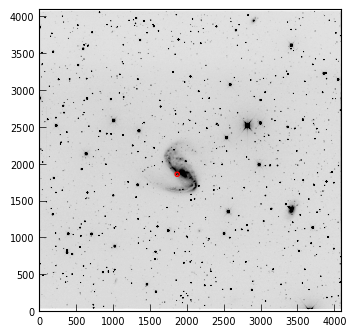

In [32]:
from autophot.packages.functions import getimage
from autophot.packages.functions import getheader

data = getimage(fpath)
header = getheader(fpath)


import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize,SquaredStretch,ZScaleInterval

# Create an ImageNormalize object
norm = ImageNormalize(stretch = SquaredStretch())
vmin,vmax = (ZScaleInterval(nsamples = 1000)).get_limits(data)

plt.imshow(data,
          vmin = vmin,
          vmax = vmax,
          norm = norm,
          origin = 'lower',
          cmap = 'Greys')

# For purpose of this example WCS is already in header 
from astropy import wcs
w = wcs.WCS(header)

# Select a source - this source is not a transient although it is close to the center of the galaxy
ra = 114.070433
dec = -69.529716

# Choose a source in image
from astropy.coordinates import SkyCoord 
c = SkyCoord(ra,dec , unit="deg") 

x_pix,y_pix = w.all_world2pix(c.ra.degree, c.dec.degree, 1)

plt.scatter(x_pix,y_pix,marker = 'o',facecolor = 'none',edgecolor = 'r')

plt.show()

Nee to tell where to look. AutoPhOT has several options:

* **target_name** give the TNS IAU name

* **target_ra**/**target_dec** give ra/dec (in ICRS) in degrees

* leave both **target_name** and **target_ra**/**target_dec** blank to perform calibration on image (astrometry, fwhm, zeropint etc) only


we enter the source given its ra/dec. Checking SkyMapper catalog, source at 114.070433 -69.529716 has r =  17.401 +/- 0.01

In [41]:
print('Performing photometry on source at ra/dec = %.6f/%.6f' %  (c.ra.degree,c.dec.degree))

syntax['target_ra'] = c.ra.degree
syntax['target_dec'] = c.dec.degree


Performing photometry on source at ra/dec = 114.070433/-69.529716


Input is now ready to run!

For this demonstration, example.fits has trusted wcs already in the header. AutoPhOT will detect wcs keywords (CRVAL1, CRVAL2, etc) and skip over this step. If the user wants to force new astrometry, regardless of what is already written, set **remove_wcs** to True.

AutoPHoT relies on a user side dictionary of telescope data. Before starting, AutoPhOT will run through all files and ensure all keywords are known. It will ask the user to clariy any non-standard keywords. This may take away from the automation side of things but such steps only need to be taken once and it allows smoother operations if working with many files. For the purpose of this example there is no need in input scale_type or scale_units as we will not be needed astrometry.net so user can type *skip*. You'll see that if you rerun the script it won't ask you for this parameters as it check the pre-existing keys beforehand.

This script (*write_yaml.yml*) is still underdevelopment as it needs to be be broad enough to accept various file structures and thusly, might fail. We hope to minimise these failures but as a backup, one can manually update the *telescope.yml* file.

In [34]:
from autophot.autophot import run

run(syntax)

> Using directory from input.yml: None
User instrument database: /Users/seanbrennan/Desktop/autophot_example/telescope.yml

Number of files: 1
1.000000 telescopes detected - checking header keywords

Checking: EXAMPLE_TELESCOPE for unique keywords

> Checking: Filters

Files removed - Wrong Image: 0


Files removed - No filter: 0


Files removed - Total: 0


+-------------+
| File: 1 / 1 |
+-------------+

File: example_APT.fits - PID: 14074
Start Time: 2020-06-08 14:08:09.701021
Telescope: EXAMPLE_TELESCOPE
Filter: r
Detecting/removing cosmic ray sources
Cosmic rays removed - image updated
Gain: 1
Exposure: 60.0

 --- WCS ---
WCS Values found

 --- Finding FWHM --- 
Image stats: mean 80.498 median 80.494 std 6.893
Number of sources before cleaning - [s = 200]: 337
Isolated sources found [ 200 sigma ]  => 295
FWHM (from all sources[295]): 4.622 
Aperture correction: -0.116 +/- 0.001

 --- Catalog searching/matching --- 
Searching for viable sources
New target name: target_ra_114.0_dec_

PSF construction source SNR: 9000
Residual table updated: 1 / 6 
PSF construction source SNR: 7507
Residual table updated: 2 / 6 
PSF construction source SNR: 7479
Residual table updated: 3 / 6 
PSF construction source SNR: 7078
Residual table updated: 4 / 6 
PSF construction source SNR: 6573
Residual table updated: 5 / 6 
PSF construction source SNR: 6449
Residual table updated: 6 / 6 
PSF Successful 

Image_radius [pix] : 7.95 +/- 0.316
FWHM PSF: 4.302 
Approx PSF mag -10.29
Image cutout size: (14,14) (14,14)
Fitting PSF to 250 sources

 --- Zeropoint --- 
> zp_r: 22.863 +/- 0.034 < 

 --- Limiting Magnitude --- 
SNR limit cutoff: 5 - Mag error limit: 0.198 
Approx. limiting magnitude: 18.087 
Target photometry performed on original image

 --- Target Photometry --- 
Perforoming PSF Photometry on Target
Fitting PSF to 1 sources
Fitting gaussian to source to get FWHM
Target FWHM: 4.274
Image 1 / 1 saved
SNR = 67 - checking limiting magnitude
Discrepancy in FWHM of 0.0 pixels
Limiting 

Output of AutoPhOT will be given in folder in either parent directory of the file (if **fname** is defined) or the parent dictionary of the fits_folder (if **fits_dir** is defined), below we display some of the visual outputs

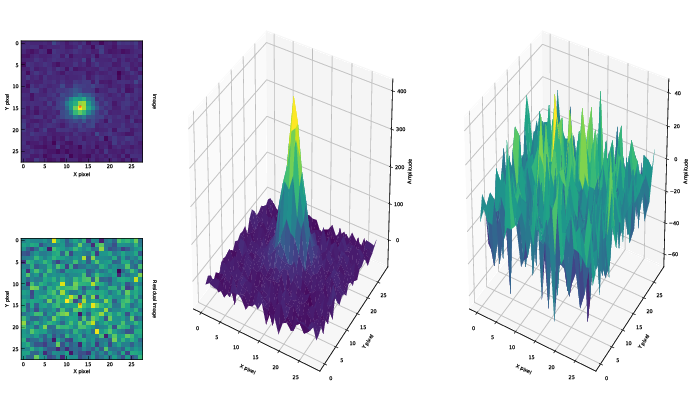

In [58]:
from wand.image import Image as WImage
PSF = WImage(filename = "/Users/seanbrennan/Desktop/autophot_example/example/target_psf_example_APT.pdf",
             resolution = 50)
PSF

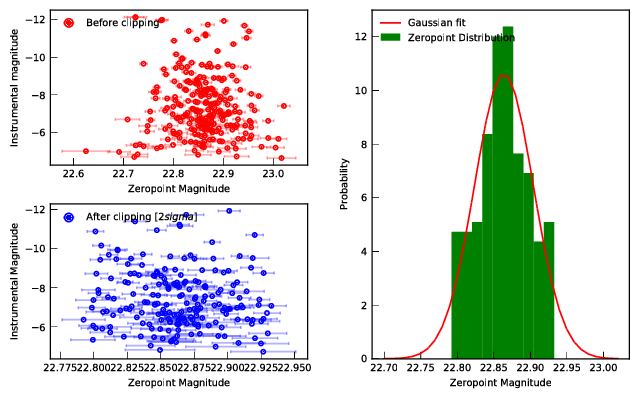

In [56]:
ZP = WImage(filename = "/Users/seanbrennan/Desktop/autophot_example/example/zp_example_APT.pdf",
            resolution = 100)
ZP

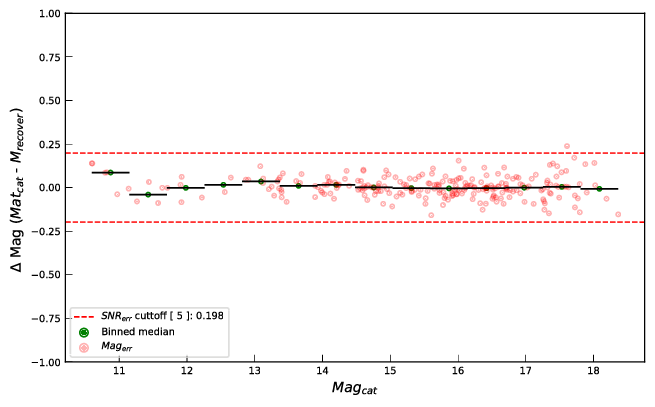

In [51]:
MAG_LIM= WImage(filename = "/Users/seanbrennan/Desktop/autophot_example/example/mag_lim_example_APT.pdf",
                resolution = 100)
MAG_LIM

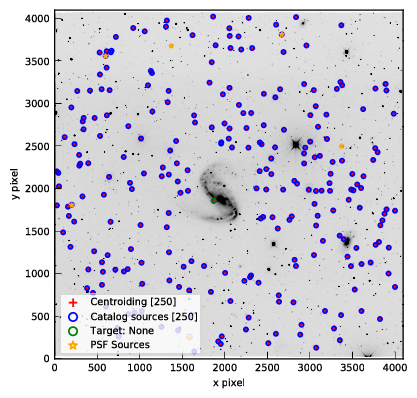

In [53]:
SOURCE_CHECK= WImage(filename = "/Users/seanbrennan/Desktop/autophot_example/example/source_check_example_APT.pdf",
                     resolution = 100)
SOURCE_CHECK